# Raisin Type Classification

### Data Source: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset
> #### *CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI: [Web Link]*

### Data Set Information:

> #### Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

In [312]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Load dataset

In [377]:
raisins = pd.read_excel(r'/Users/danielschneider/Downloads/Raisin_Dataset/Raisin_Dataset.xlsx')

### Constructing training and testing data

In [381]:
#Using a binary classification with 1 or 0 denoting the raisin type label
binary_dict = {'Kecimen': 0, 'Besni': 1}

train, test = train_test_split(raisins,test_size=0.33)
train.iloc[:,7] = train.iloc[:,7].apply(lambda x: binary_dict[x])
test.iloc[:,7] = test.iloc[:,7].apply(lambda x: binary_dict[x])

X_train = train[train.columns[1:7]]
norm_1 = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)

Y_train = train.iloc[:,-1]
Y_train = np.asarray(Y_train)
# Ensure that Y_train is (num_samples, 1)
Y_train = np.expand_dims(Y_train, axis=1)

#Check shapes of matrices
X_train.shape, Y_train.shape

#Do the same with testing data
X_test = test[test.columns[1:7]]
norm_2 = MinMaxScaler().fit(X_test)
X_test = norm.transform(X_test)

Y_test = test.iloc[:,-1]
Y_test = np.asarray(Y_test)
Y_test = np.expand_dims(Y_test, axis=1)
#Check shapes of matrices
Y_test.shape, X_test.shape



/Users/danielschneider/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


((297, 1), (297, 6))

## Creating a dense feedforward neural network

In [353]:
#6-dimensional input, one hidden layer with 256 neurons and a relu activation function
#and an output layer with a sigmoid activation function
model = keras.Sequential([
        layers.Input(shape=(6,)),
        layers.Dense(256, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
])

#500 iterations, a batch size of 32, a learning rate of 0.01, using stochastic gradient descent 
iters = 500
batch_size = 32
lr = 0.01
optim = tf.keras.optimizers.SGD(learning_rate = lr,momentum=0.9)

#Using binary cross-entropy loss function to match labels of 0 and 1

model.compile(
    optimizer = optim,  # Optimizer
    loss = 'binary_crossentropy', # Loss function
    metrics = ['binary_crossentropy', 'accuracy']

)

history = model.fit(
  X_train, Y_train,
  validation_data=(X_test, Y_test),
  epochs = iters,  
  batch_size = batch_size,
  validation_split = 0,
  verbose = 2,
  shuffle = True
)


Train on 603 samples, validate on 297 samples
Epoch 1/500
603/603 - 1s - loss: 0.6838 - binary_crossentropy: 0.6838 - accuracy: 0.7330 - val_loss: 0.6698 - val_binary_crossentropy: 0.6698 - val_accuracy: 0.7946
Epoch 2/500
603/603 - 0s - loss: 0.6563 - binary_crossentropy: 0.6563 - accuracy: 0.6385 - val_loss: 0.6408 - val_binary_crossentropy: 0.6408 - val_accuracy: 0.7576
Epoch 3/500
603/603 - 0s - loss: 0.6297 - binary_crossentropy: 0.6297 - accuracy: 0.8109 - val_loss: 0.6193 - val_binary_crossentropy: 0.6193 - val_accuracy: 0.8350
Epoch 4/500
603/603 - 0s - loss: 0.6018 - binary_crossentropy: 0.6018 - accuracy: 0.8060 - val_loss: 0.5917 - val_binary_crossentropy: 0.5917 - val_accuracy: 0.8249
Epoch 5/500
603/603 - 0s - loss: 0.5715 - binary_crossentropy: 0.5715 - accuracy: 0.8690 - val_loss: 0.5717 - val_binary_crossentropy: 0.5717 - val_accuracy: 0.8148
Epoch 6/500
603/603 - 0s - loss: 0.5451 - binary_crossentropy: 0.5451 - accuracy: 0.8723 - val_loss: 0.5442 - val_binary_crossent

Epoch 51/500
603/603 - 0s - loss: 0.3368 - binary_crossentropy: 0.3368 - accuracy: 0.8806 - val_loss: 0.3825 - val_binary_crossentropy: 0.3825 - val_accuracy: 0.8350
Epoch 52/500
603/603 - 0s - loss: 0.3356 - binary_crossentropy: 0.3356 - accuracy: 0.8905 - val_loss: 0.3817 - val_binary_crossentropy: 0.3817 - val_accuracy: 0.8215
Epoch 53/500
603/603 - 0s - loss: 0.3341 - binary_crossentropy: 0.3341 - accuracy: 0.8839 - val_loss: 0.3850 - val_binary_crossentropy: 0.3850 - val_accuracy: 0.8418
Epoch 54/500
603/603 - 0s - loss: 0.3337 - binary_crossentropy: 0.3337 - accuracy: 0.8889 - val_loss: 0.3826 - val_binary_crossentropy: 0.3826 - val_accuracy: 0.8350
Epoch 55/500
603/603 - 0s - loss: 0.3346 - binary_crossentropy: 0.3346 - accuracy: 0.8856 - val_loss: 0.3903 - val_binary_crossentropy: 0.3903 - val_accuracy: 0.8485
Epoch 56/500
603/603 - 0s - loss: 0.3359 - binary_crossentropy: 0.3359 - accuracy: 0.8839 - val_loss: 0.3847 - val_binary_crossentropy: 0.3847 - val_accuracy: 0.8418
Epoc

Epoch 101/500
603/603 - 0s - loss: 0.3274 - binary_crossentropy: 0.3274 - accuracy: 0.8872 - val_loss: 0.3833 - val_binary_crossentropy: 0.3833 - val_accuracy: 0.8485
Epoch 102/500
603/603 - 0s - loss: 0.3269 - binary_crossentropy: 0.3269 - accuracy: 0.8839 - val_loss: 0.3836 - val_binary_crossentropy: 0.3836 - val_accuracy: 0.8485
Epoch 103/500
603/603 - 0s - loss: 0.3281 - binary_crossentropy: 0.3281 - accuracy: 0.8823 - val_loss: 0.3836 - val_binary_crossentropy: 0.3836 - val_accuracy: 0.8451
Epoch 104/500
603/603 - 0s - loss: 0.3303 - binary_crossentropy: 0.3303 - accuracy: 0.8789 - val_loss: 0.3849 - val_binary_crossentropy: 0.3849 - val_accuracy: 0.8485
Epoch 105/500
603/603 - 0s - loss: 0.3276 - binary_crossentropy: 0.3276 - accuracy: 0.8872 - val_loss: 0.3838 - val_binary_crossentropy: 0.3838 - val_accuracy: 0.8485
Epoch 106/500
603/603 - 0s - loss: 0.3269 - binary_crossentropy: 0.3269 - accuracy: 0.8839 - val_loss: 0.3815 - val_binary_crossentropy: 0.3815 - val_accuracy: 0.838

603/603 - 0s - loss: 0.3237 - binary_crossentropy: 0.3237 - accuracy: 0.8839 - val_loss: 0.3834 - val_binary_crossentropy: 0.3834 - val_accuracy: 0.8485
Epoch 151/500
603/603 - 0s - loss: 0.3264 - binary_crossentropy: 0.3264 - accuracy: 0.8839 - val_loss: 0.3856 - val_binary_crossentropy: 0.3856 - val_accuracy: 0.8485
Epoch 152/500
603/603 - 0s - loss: 0.3291 - binary_crossentropy: 0.3291 - accuracy: 0.8773 - val_loss: 0.3861 - val_binary_crossentropy: 0.3861 - val_accuracy: 0.8485
Epoch 153/500
603/603 - 0s - loss: 0.3264 - binary_crossentropy: 0.3264 - accuracy: 0.8839 - val_loss: 0.3798 - val_binary_crossentropy: 0.3798 - val_accuracy: 0.8418
Epoch 154/500
603/603 - 0s - loss: 0.3234 - binary_crossentropy: 0.3234 - accuracy: 0.8823 - val_loss: 0.3818 - val_binary_crossentropy: 0.3818 - val_accuracy: 0.8451
Epoch 155/500
603/603 - 0s - loss: 0.3294 - binary_crossentropy: 0.3294 - accuracy: 0.8789 - val_loss: 0.3790 - val_binary_crossentropy: 0.3790 - val_accuracy: 0.8485
Epoch 156/50

Epoch 200/500
603/603 - 0s - loss: 0.3255 - binary_crossentropy: 0.3255 - accuracy: 0.8806 - val_loss: 0.3844 - val_binary_crossentropy: 0.3844 - val_accuracy: 0.8485
Epoch 201/500
603/603 - 0s - loss: 0.3243 - binary_crossentropy: 0.3243 - accuracy: 0.8839 - val_loss: 0.3810 - val_binary_crossentropy: 0.3810 - val_accuracy: 0.8485
Epoch 202/500
603/603 - 0s - loss: 0.3223 - binary_crossentropy: 0.3223 - accuracy: 0.8839 - val_loss: 0.3811 - val_binary_crossentropy: 0.3811 - val_accuracy: 0.8485
Epoch 203/500
603/603 - 0s - loss: 0.3238 - binary_crossentropy: 0.3238 - accuracy: 0.8839 - val_loss: 0.3854 - val_binary_crossentropy: 0.3854 - val_accuracy: 0.8485
Epoch 204/500
603/603 - 0s - loss: 0.3240 - binary_crossentropy: 0.3240 - accuracy: 0.8839 - val_loss: 0.3801 - val_binary_crossentropy: 0.3801 - val_accuracy: 0.8451
Epoch 205/500
603/603 - 0s - loss: 0.3240 - binary_crossentropy: 0.3240 - accuracy: 0.8789 - val_loss: 0.3786 - val_binary_crossentropy: 0.3786 - val_accuracy: 0.841

603/603 - 0s - loss: 0.3195 - binary_crossentropy: 0.3195 - accuracy: 0.8823 - val_loss: 0.3800 - val_binary_crossentropy: 0.3800 - val_accuracy: 0.8451
Epoch 250/500
603/603 - 0s - loss: 0.3203 - binary_crossentropy: 0.3203 - accuracy: 0.8789 - val_loss: 0.3814 - val_binary_crossentropy: 0.3814 - val_accuracy: 0.8519
Epoch 251/500
603/603 - 0s - loss: 0.3223 - binary_crossentropy: 0.3223 - accuracy: 0.8740 - val_loss: 0.3783 - val_binary_crossentropy: 0.3783 - val_accuracy: 0.8485
Epoch 252/500
603/603 - 0s - loss: 0.3227 - binary_crossentropy: 0.3227 - accuracy: 0.8756 - val_loss: 0.3872 - val_binary_crossentropy: 0.3872 - val_accuracy: 0.8384
Epoch 253/500
603/603 - 0s - loss: 0.3214 - binary_crossentropy: 0.3214 - accuracy: 0.8856 - val_loss: 0.3793 - val_binary_crossentropy: 0.3793 - val_accuracy: 0.8451
Epoch 254/500
603/603 - 0s - loss: 0.3208 - binary_crossentropy: 0.3208 - accuracy: 0.8839 - val_loss: 0.3783 - val_binary_crossentropy: 0.3783 - val_accuracy: 0.8418
Epoch 255/50

Epoch 299/500
603/603 - 0s - loss: 0.3233 - binary_crossentropy: 0.3233 - accuracy: 0.8773 - val_loss: 0.3817 - val_binary_crossentropy: 0.3817 - val_accuracy: 0.8519
Epoch 300/500
603/603 - 0s - loss: 0.3188 - binary_crossentropy: 0.3188 - accuracy: 0.8806 - val_loss: 0.3794 - val_binary_crossentropy: 0.3794 - val_accuracy: 0.8451
Epoch 301/500
603/603 - 0s - loss: 0.3194 - binary_crossentropy: 0.3194 - accuracy: 0.8823 - val_loss: 0.3782 - val_binary_crossentropy: 0.3782 - val_accuracy: 0.8418
Epoch 302/500
603/603 - 0s - loss: 0.3211 - binary_crossentropy: 0.3211 - accuracy: 0.8806 - val_loss: 0.3777 - val_binary_crossentropy: 0.3777 - val_accuracy: 0.8485
Epoch 303/500
603/603 - 0s - loss: 0.3181 - binary_crossentropy: 0.3181 - accuracy: 0.8773 - val_loss: 0.3898 - val_binary_crossentropy: 0.3898 - val_accuracy: 0.8283
Epoch 304/500
603/603 - 0s - loss: 0.3255 - binary_crossentropy: 0.3255 - accuracy: 0.8756 - val_loss: 0.3794 - val_binary_crossentropy: 0.3794 - val_accuracy: 0.845

603/603 - 0s - loss: 0.3168 - binary_crossentropy: 0.3168 - accuracy: 0.8823 - val_loss: 0.3769 - val_binary_crossentropy: 0.3769 - val_accuracy: 0.8451
Epoch 349/500
603/603 - 0s - loss: 0.3157 - binary_crossentropy: 0.3157 - accuracy: 0.8823 - val_loss: 0.3819 - val_binary_crossentropy: 0.3819 - val_accuracy: 0.8519
Epoch 350/500
603/603 - 0s - loss: 0.3168 - binary_crossentropy: 0.3168 - accuracy: 0.8839 - val_loss: 0.3781 - val_binary_crossentropy: 0.3781 - val_accuracy: 0.8418
Epoch 351/500
603/603 - 0s - loss: 0.3157 - binary_crossentropy: 0.3157 - accuracy: 0.8823 - val_loss: 0.3809 - val_binary_crossentropy: 0.3809 - val_accuracy: 0.8485
Epoch 352/500
603/603 - 0s - loss: 0.3191 - binary_crossentropy: 0.3191 - accuracy: 0.8806 - val_loss: 0.3770 - val_binary_crossentropy: 0.3770 - val_accuracy: 0.8451
Epoch 353/500
603/603 - 0s - loss: 0.3168 - binary_crossentropy: 0.3168 - accuracy: 0.8806 - val_loss: 0.3791 - val_binary_crossentropy: 0.3791 - val_accuracy: 0.8451
Epoch 354/50

Epoch 398/500
603/603 - 0s - loss: 0.3171 - binary_crossentropy: 0.3171 - accuracy: 0.8773 - val_loss: 0.3763 - val_binary_crossentropy: 0.3763 - val_accuracy: 0.8485
Epoch 399/500
603/603 - 0s - loss: 0.3186 - binary_crossentropy: 0.3186 - accuracy: 0.8756 - val_loss: 0.3782 - val_binary_crossentropy: 0.3782 - val_accuracy: 0.8451
Epoch 400/500
603/603 - 0s - loss: 0.3151 - binary_crossentropy: 0.3151 - accuracy: 0.8789 - val_loss: 0.3782 - val_binary_crossentropy: 0.3782 - val_accuracy: 0.8485
Epoch 401/500
603/603 - 0s - loss: 0.3155 - binary_crossentropy: 0.3155 - accuracy: 0.8789 - val_loss: 0.3765 - val_binary_crossentropy: 0.3765 - val_accuracy: 0.8451
Epoch 402/500
603/603 - 0s - loss: 0.3154 - binary_crossentropy: 0.3154 - accuracy: 0.8823 - val_loss: 0.3810 - val_binary_crossentropy: 0.3810 - val_accuracy: 0.8519
Epoch 403/500
603/603 - 0s - loss: 0.3149 - binary_crossentropy: 0.3149 - accuracy: 0.8839 - val_loss: 0.3803 - val_binary_crossentropy: 0.3803 - val_accuracy: 0.848

603/603 - 0s - loss: 0.3143 - binary_crossentropy: 0.3143 - accuracy: 0.8789 - val_loss: 0.3760 - val_binary_crossentropy: 0.3760 - val_accuracy: 0.8485
Epoch 448/500
603/603 - 0s - loss: 0.3136 - binary_crossentropy: 0.3136 - accuracy: 0.8806 - val_loss: 0.3761 - val_binary_crossentropy: 0.3761 - val_accuracy: 0.8451
Epoch 449/500
603/603 - 0s - loss: 0.3130 - binary_crossentropy: 0.3130 - accuracy: 0.8839 - val_loss: 0.3813 - val_binary_crossentropy: 0.3813 - val_accuracy: 0.8519
Epoch 450/500
603/603 - 0s - loss: 0.3139 - binary_crossentropy: 0.3139 - accuracy: 0.8839 - val_loss: 0.3769 - val_binary_crossentropy: 0.3769 - val_accuracy: 0.8451
Epoch 451/500
603/603 - 0s - loss: 0.3150 - binary_crossentropy: 0.3150 - accuracy: 0.8806 - val_loss: 0.3763 - val_binary_crossentropy: 0.3763 - val_accuracy: 0.8418
Epoch 452/500
603/603 - 0s - loss: 0.3122 - binary_crossentropy: 0.3122 - accuracy: 0.8823 - val_loss: 0.3830 - val_binary_crossentropy: 0.3830 - val_accuracy: 0.8418
Epoch 453/50

Epoch 497/500
603/603 - 0s - loss: 0.3137 - binary_crossentropy: 0.3137 - accuracy: 0.8823 - val_loss: 0.3917 - val_binary_crossentropy: 0.3917 - val_accuracy: 0.8316
Epoch 498/500
603/603 - 0s - loss: 0.3206 - binary_crossentropy: 0.3206 - accuracy: 0.8773 - val_loss: 0.3749 - val_binary_crossentropy: 0.3749 - val_accuracy: 0.8485
Epoch 499/500
603/603 - 0s - loss: 0.3105 - binary_crossentropy: 0.3105 - accuracy: 0.8789 - val_loss: 0.3824 - val_binary_crossentropy: 0.3824 - val_accuracy: 0.8418
Epoch 500/500
603/603 - 0s - loss: 0.3126 - binary_crossentropy: 0.3126 - accuracy: 0.8806 - val_loss: 0.3760 - val_binary_crossentropy: 0.3760 - val_accuracy: 0.8519


Train: 0.884, Test: 0.852


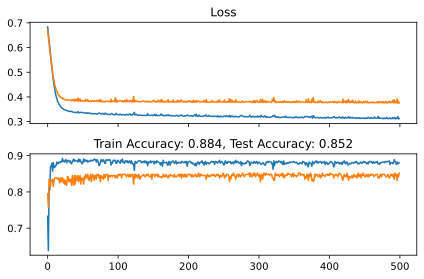

In [376]:
train_acc = model.evaluate(X_train, Y_train, verbose=0)
test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc[2], test_acc[2]))

# #Plotting Accuracy and Loss
fig, (ax1,ax2) = plt.subplots(2, sharex=True)

#Loss
ax1.set_title('Loss')
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='test')

#Accuracy
ax2.set_title('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc[2], test_acc[2]))
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='test')

fig.tight_layout()


